In [65]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime as dt
import folium
from folium.plugins import MarkerCluster
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
plt.style.use('ggplot')





import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [66]:
data = pd.read_csv('911.csv')

In [67]:
data.shape

(317171, 9)

In [68]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [69]:
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
317166,40.215185,-75.255993,HANCOCK RD & FOREST LN; UPPER GWYNEDD; 2018-03...,19454.0,Traffic: VEHICLE ACCIDENT -,2018-03-02 19:43:32,UPPER GWYNEDD,HANCOCK RD & FOREST LN,1.0
317167,40.100262,-75.346145,LINE ALY & E 9TH ST; BRIDGEPORT; 2018-03-02 @ ...,19405.0,Traffic: VEHICLE ACCIDENT -,2018-03-02 19:39:17,BRIDGEPORT,LINE ALY & E 9TH ST,1.0
317168,40.105043,-75.186634,CHURCH RD & LANTERN LN; SPRINGFIELD; 2018-03-0...,19075.0,Fire: ELECTRICAL FIRE OUTSIDE,2018-03-02 19:46:40,SPRINGFIELD,CHURCH RD & LANTERN LN,1.0
317169,40.187430,-75.445007,COLLEGEVILLE RD & RIVER RD; LOWER PROVIDENCE; ...,19426.0,Fire: ELECTRICAL FIRE OUTSIDE,2018-03-02 19:48:27,LOWER PROVIDENCE,COLLEGEVILLE RD & RIVER RD,1.0
317170,40.011015,-75.297250,WYOMING AVE & W LANCASTER AVE; LOWER MERION; 2...,19003.0,Fire: ELECTRICAL FIRE OUTSIDE,2018-03-02 19:50:58,LOWER MERION,WYO,NaN


In [70]:
data.describe()

,lat,lng,zip,e
count,317171.000000,317171.000000,278610.000000,317170.0
mean,40.159267,-75.316483,19234.958856,1.0
std,0.088538,0.160384,302.733278,0.0
min,30.333596,-95.595595,8361.000000,1.0
25%,40.100130,-75.393008,19038.000000,1.0
50%,40.144526,-75.304602,19401.000000,1.0
75%,40.229008,-75.210769,19446.000000,1.0
max,41.167156,-74.813670,77316.000000,1.0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317171 entries, 0 to 317170
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        317171 non-null  float64
 1   lng        317171 non-null  float64
 2   desc       317171 non-null  object 
 3   zip        278610 non-null  float64
 4   title      317171 non-null  object 
 5   timeStamp  317171 non-null  object 
 6   twp        317059 non-null  object 
 7   addr       317171 non-null  object 
 8   e          317170 non-null  float64
dtypes: float64(4), object(5)
memory usage: 21.8+ MB


In [72]:
data.sample(frac=0.00002, random_state=1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
284337,40.205293,-75.255032,DEKALB PIKE & MEETINGHOUSE RD; LOWER GWYNEDD; ...,19454.0,Traffic: DISABLED VEHICLE -,2017-12-16 11:01:04,LOWER GWYNEDD,DEKALB PIKE & MEETINGHOUSE RD,1.0
89320,40.185248,-75.539101,N 4TH AVE & MAIN ST; ROYERSFORD; 2016-07-30 @ ...,19468.0,Traffic: DISABLED VEHICLE -,2016-07-30 11:59:18,ROYERSFORD,N 4TH AVE & MAIN ST,1.0
60879,40.113813,-75.345120,LAFAYETTE ST & SWEDE ST; NORRISTOWN; Station ...,19401.0,EMS: VEHICLE ACCIDENT,2016-05-18 09:11:36,NORRISTOWN,LAFAYETTE ST & SWEDE ST,1.0
209825,40.015949,-75.263281,OLD GULPH RD & BRYN MAWR AVE; LOWER MERION; 20...,19072.0,Traffic: VEHICLE ACCIDENT -,2017-06-09 12:31:35,LOWER MERION,OLD GULPH RD & BRYN MAWR AVE,1.0
148791,40.132075,-75.419329,LAWRENCE RD & BUCKWALTER RD; LOWER PROVIDENCE;...,19403.0,Fire: VEHICLE ACCIDENT,2016-12-27 20:43:16,LOWER PROVIDENCE,LAWRENCE RD & BUCKWALTER RD,1.0
200296,40.155362,-75.301960,DEKALB PIKE & YOST RD; WHITPAIN; 2017-05-15 @ ...,19422.0,Traffic: VEHICLE ACCIDENT -,2017-05-15 17:06:49,WHITPAIN,DEKALB PIKE & YOST RD,1.0


In [74]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          38561
title            0
timeStamp        0
twp            112
addr             0
e                1
dtype: int64

In [75]:
data.dropna(subset=['twp'], inplace=True)

In [76]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          38496
title            0
timeStamp        0
twp              0
addr             0
e                1
dtype: int64

In [77]:
data['timeStamp'].head(3)

0    2015-12-10 17:10:52
1    2015-12-10 17:29:21
2    2015-12-10 14:39:21
Name: timeStamp, dtype: object

In [78]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [79]:
data['timeStamp'].head(3)

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
Name: timeStamp, dtype: datetime64[ns]

In [80]:
data['year'] = data['timeStamp'].dt.year
data['day'] = data['timeStamp'].dt.day
data['month'] = data['timeStamp'].dt.month
data['dayofweek'] = data['timeStamp'].dt.dayofweek
data['dayofyear'] = data['timeStamp'].dt.dayofyear
data['hour'] = data['timeStamp'].dt.hour

In [81]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,day,month,dayofweek,dayofyear,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,2015,10,12,3,344,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,2015,10,12,3,344,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,2015,10,12,3,344,14


In [82]:
data['reason_cat'] = data['title'].apply(lambda x:x.split(':')[0])
data['reason_cat'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [83]:
data['title'] = data['title'].apply(lambda x:x.split(':')[1])

data['title'] = data['title'].apply(lambda x:x.split('-')[0]).apply(lambda x:x.strip())

# Now our data looks more badass
data['title'].unique()

array(['BACK PAINS/INJURY', 'DIABETIC EMERGENCY', 'GAS',
       'CARDIAC EMERGENCY', 'DIZZINESS', 'HEAD INJURY', 'NAUSEA/VOMITING',
       'RESPIRATORY EMERGENCY', 'SYNCOPAL EPISODE', 'VEHICLE ACCIDENT',
       'DISABLED VEHICLE', 'APPLIANCE FIRE', 'GENERAL WEAKNESS',
       'CARBON MONOXIDE DETECTOR', 'UNKNOWN MEDICAL EMERGENCY',
       'UNRESPONSIVE SUBJECT', 'ALTERED MENTAL STATUS', 'FIRE ALARM',
       'CVA/STROKE', 'ROAD OBSTRUCTION', 'SUBJECT IN PAIN',
       'HEMORRHAGING', 'FALL VICTIM', 'ASSAULT VICTIM', 'SEIZURES',
       'MEDICAL ALERT ALARM', 'ABDOMINAL PAINS', 'PUMP DETAIL',
       'FIRE INVESTIGATION', 'OVERDOSE', 'MATERNITY',
       'UNCONSCIOUS SUBJECT', 'CHOKING', 'LACERATIONS',
       'TRASH/DUMPSTER FIRE', 'UNKNOWN TYPE FIRE', 'BUILDING FIRE',
       'ELECTRICAL FIRE OUTSIDE', 'DEBRIS/FLUIDS ON HIGHWAY', 'FEVER',
       'ALLERGIC REACTION', 'VEHICLE LEAKING FUEL', 'FRACTURE',
       'BURN VICTIM', 'RESCUE', 'WOODS/FIELD FIRE',
       'FIRE SPECIAL SERVICE', 'VEHICLE 

In [84]:
data['title'].nunique()

81

In [85]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'year', 'day', 'month', 'dayofweek', 'dayofyear', 'hour', 'reason_cat'],
      dtype='object')

In [87]:
reason = pd.DataFrame({'reason':['EMS', 'Traffic', 'Fire'], 'count':[3265850, 227045, 98797]})
reason.style.background_gradient(cmap='Blues', subset=['count'])

,reason,count
0,EMS,3265850
1,Traffic,227045
2,Fire,98797


In [88]:
# Bar Chart
fig1 = px.bar(reason, reason['reason'], reason['count'], color_discrete_sequence=[px.colors.qualitative.Pastel], text=reason['count'])

fig1.update_layout(title={
                  'text': "Category of Reasons for 911 Calls",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  xaxis_title='Reason Category',
                  yaxis_title='Count',
                  showlegend=False,
                  template='ggplot2')

# -----------------------------------------------------------

# Pie Chart
fig2 = px.pie(reason, reason['reason'], reason['count'],
              color_discrete_sequence=px.colors.qualitative.Pastel, hole=0.5)

fig2.update_layout(title={
                  'text': "Category of Reasons for 911 Calls (Pie Chart)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   height=600,
                  template='plotly_white')

fig2.update_traces(textposition='inside', textinfo='percent+label', pull=[0.2, 0, 0])

fig2.data[0].marker.line.width = 2
fig2.data[0].marker.line.color = "black"

# -----------------------------------------------------------

fig1.show()
fig2.show()


In [89]:
data['title'].value_counts()\
             .head(10)\
             .to_frame(name='count')\
             .reset_index()\
             .style.background_gradient(cmap='Reds', subset=['count'])

,index,count
0,VEHICLE ACCIDENT,92345
1,DISABLED VEHICLE,23053
2,FIRE ALARM,17994
3,RESPIRATORY EMERGENCY,16193
4,FALL VICTIM,16006
5,CARDIAC EMERGENCY,15705
6,ROAD OBSTRUCTION,9857
7,SUBJECT IN PAIN,8883
8,HEAD INJURY,8305
9,UNKNOWN MEDICAL EMERGENCY,5559


In [90]:
top_10_reasons = data['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
fig = px.bar(top_10_reasons, color_discrete_sequence=[px.colors.qualitative.Pastel], orientation='h', text=top_10_reasons['count'].sort_values(ascending=True))

fig.update_layout(title={
                  'text': "Top 10 Reasons for 911 Calls",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  xaxis_title='Reasons',
                  yaxis_title='Count',
                  showlegend=False,
                  template='plotly_white')

fig.show()

In [91]:
data['zip'].value_counts()\
           .head(20)\
           .to_frame(name='count')\
           .reset_index()\
           .style.background_gradient(cmap='Greens', subset=['count'])

,index,count
0,19401.000000,21601
1,19464.000000,21082
2,19403.000000,16041
3,19446.000000,15329
4,19406.000000,10540
5,19002.000000,9973
6,19468.000000,9360
7,19046.000000,8742
8,19454.000000,8700
9,19090.000000,8376


In [92]:
top_10_zip = data['zip'].value_counts().to_frame(name='count').head(10).sort_values(by='count')

In [93]:
data['twp'].value_counts()\
           .head(20)\
           .to_frame(name='count')\
           .reset_index()\
           .style.background_gradient(cmap='Blues', subset=['count'])

,index,count
0,LOWER MERION,27125
1,ABINGTON,19539
2,NORRISTOWN,18026
3,UPPER MERION,16844
4,CHELTENHAM,14576
5,POTTSTOWN,13216
6,UPPER MORELAND,10903
7,LOWER PROVIDENCE,10502
8,PLYMOUTH,9515
9,HORSHAM,8943


In [94]:
top_10_twp = data['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count')

top_10_twp.iplot(kind='bar',
                 color='red',
                 gridcolor='white',
                 linecolor='black',
                 theme='pearl',
                 title='Township',
                 yTitle='Number of 911 Calss',
                 bargap=0.3,
                 xTitle='Day of Week'
                 )

# Seaborn Way
# sb.set_style('whitegrid')
# plt.subplots(figsize=(14, 7))
# ax = sb.barplot(top_10_twp.index, top_10_twp['count'])
# plt.xticks(rotation=90)
# ax.set(xlabel='Township', ylabel='Number of 911 Calls')
# plt.title('Top 10 Township For 911 Calls')
# plt.show()

In [95]:
print(f"Minimum year in data: {data['year'].min()}")
print(f"Most recent year in data: {data['year'].max()}")
print(f"Total number of years: {data['year'].max()-data['year'].min()}")

Minimum year in data: 2015
Most recent year in data: 2018
Total number of years: 3


In [96]:
data.drop(data[data['lng']>-73].index, inplace=True)
data.drop(data[data['lng']<-76].index, inplace=True)

In [97]:
data_15 = data[data['year']==2015]
data_16 = data[data['year']==2016]
data_17 = data[data['year']==2017]
data_18 = data[data['year']==2018]
data_19 = data[data['year']==2019]
data_20 = data[data['year']==2020]

In [98]:
top_twp_15 = data_15['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_twp_16 = data_16['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_twp_17 = data_17['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_twp_18 = data_18['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_twp_19 = data_19['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_twp_20 = data_20['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count')

In [99]:
fig = make_subplots(rows=3, cols=2,
                   subplot_titles=("Year 2015","Year 2016", "Year 2017", "Year 2018", "Year 2019", "Year 2020"))

fig.add_trace(go.Bar(x = top_twp_15.index, y=top_twp_15['count'], name='2015'), row=1, col=1)

fig.add_trace(go.Bar(x = top_twp_16.index, y=top_twp_16['count'], name='2016'), row=1, col=2)

fig.add_trace(go.Bar(x = top_twp_17.index, y=top_twp_17['count'], name='2017'), row=2, col=1)

fig.add_trace(go.Bar(x = top_twp_18.index, y=top_twp_18['count'], name='2018'), row=2, col=2)

fig.add_trace(go.Bar(x = top_twp_19.index, y=top_twp_19['count'], name='2019'), row=3, col=1)

fig.add_trace(go.Bar(x = top_twp_20.index, y=top_twp_20['count'], name='2020'), row=3, col=2)

fig.update_layout(title_text='Top Townships for 911 Calls', height=1500, template='plotly_white')

fig.show()

In [100]:
top_twp_20 = data_20['twp'].value_counts().to_frame(name='count').head(10).sort_values(by='count', ascending=False)
top_twp_20.style.background_gradient(cmap='Blues', subset=['count'])

,count


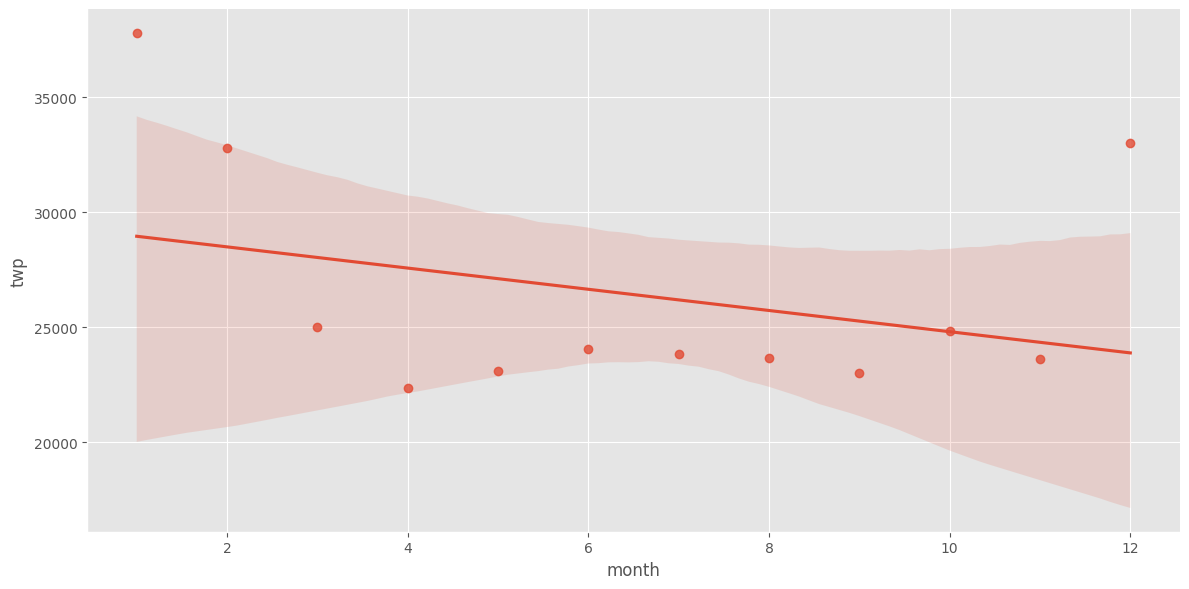

In [101]:
sb.lmplot(x='month', y='twp', data=data.groupby('month').count().reset_index(), height=6, aspect=2)

In [102]:
top_title_15 = data_15['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_title_16 = data_16['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_title_17 = data_17['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_title_18 = data_18['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_title_19 = data_19['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')
top_title_20 = data_20['title'].value_counts().to_frame(name='count').head(10).sort_values(by='count')

In [103]:
fig = make_subplots(rows=3, cols=2,
                   subplot_titles=("Year 2015","Year 2016", "Year 2017", "Year 2018", "Year 2019", "Year 2020"))

fig.add_trace(go.Bar(x = top_title_15.index, y=top_title_15['count'], name='2015'), row=1, col=1)

fig.add_trace(go.Bar(x = top_title_16.index, y=top_title_16['count'], name='2016'), row=1, col=2)

fig.add_trace(go.Bar(x = top_title_17.index, y=top_title_17['count'], name='2017'), row=2, col=1)

fig.add_trace(go.Bar(x = top_title_18.index, y=top_title_18['count'], name='2018'), row=2, col=2)

fig.add_trace(go.Bar(x = top_title_19.index, y=top_title_19['count'], name='2019'), row=3, col=1)

fig.add_trace(go.Bar(x = top_title_20.index, y=top_title_20['count'], name='2020'), row=3, col=2)

fig.update_layout(title_text='Top Reasons for 911 Calls', height=1500, template='plotly_white')

fig.show()

In [104]:
map_plot_20 = data[['lat', 'lng', 'twp']].groupby('twp').mean().reset_index()
map_plot_20.head(15).style.background_gradient(cmap='Reds', subset=['lat'])\
                    .background_gradient(cmap='Greens', subset=['lng'])

,twp,lat,lng
0,ABINGTON,40.113239,-75.120811
1,AMBLER,40.157313,-75.221056
2,BERKS COUNTY,40.283752,-75.562233
3,BRIDGEPORT,40.104043,-75.343401
4,BRYN ATHYN,40.136343,-75.062806
5,BUCKS COUNTY,40.254760,-75.257664
6,CHELTENHAM,40.077423,-75.138257
7,CHESTER COUNTY,40.220843,-75.520211
8,COLLEGEVILLE,40.186162,-75.456542
9,CONSHOHOCKEN,40.076337,-75.303279


In [105]:
map_data = folium.Map(location=(40.2547, -75.3405), zoom_start = 11, width='70%', max_zoom=11, min_zoom=11)

for lat, lng, twp in zip(map_plot_20.lat, map_plot_20.lng, map_plot_20.twp):
    folium.Marker(
    radius=1,
    location=[lat, lng],
    color='crimson',
    popup=twp,
    icon=folium.Icon(color='red'),
    ).add_to(map_data)



#  display interactive map
display(map_data)

In [106]:
map_data = folium.Map(location=(40.2547, -75.3405), zoom_start = 11, width='70%', max_zoom=11, min_zoom=11)

for lat, lng in zip(data_20.lat.unique(), data_20.lng.unique()):
    folium.CircleMarker(
    radius=0.7,
    location=[lat, lng],
    color='crimson',
    fill=True,
    fillcolor='crimson'
    ).add_to(map_data)



#  display interactive map
display(map_data)

In [107]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

mmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

data['month']=data['month'].map(mmap)

data['dayofweek']=data['dayofweek'].map(dmap)

In [108]:
data['dayofweek'].value_counts()

Fri    49999
Tue    47488
Wed    47258
Thu    46483
Mon    45752
Sat    42413
Sun    37655
Name: dayofweek, dtype: int64

In [109]:
data['dayofweek'].value_counts().iplot(kind='bar',
                                       color='red',
                                       gridcolor='white',
                                       linecolor='black',
                                       theme='pearl',
                                       title='Calls During Week',
                                       yTitle='Count',
                                       bargap=0.4,
                                       opacity=0.7,
                                       xTitle='Day of Week'
                                      )

<Axes: xlabel='hour', ylabel='dayofweek'>

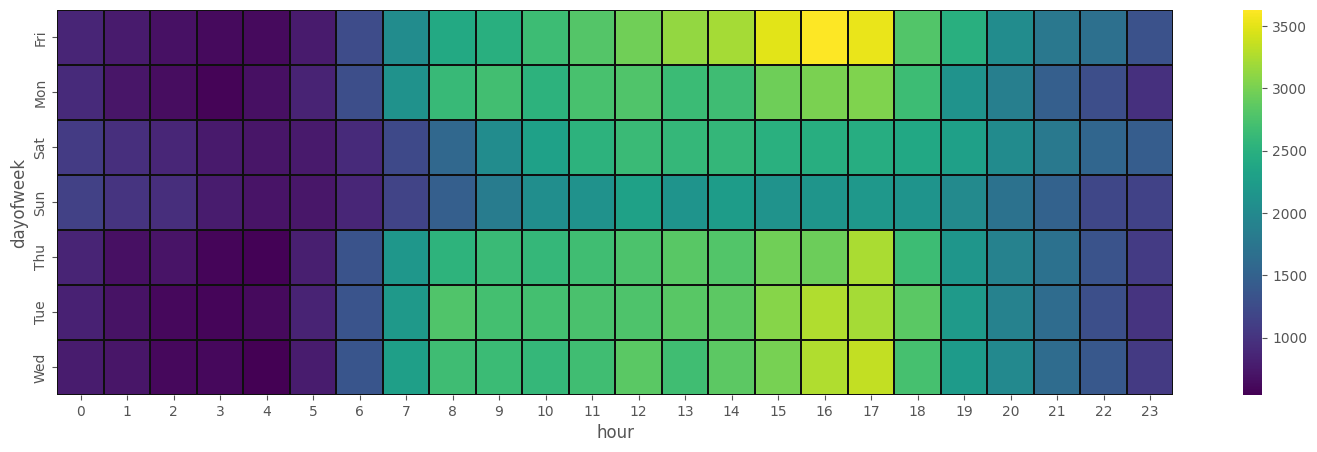

In [110]:
dayHour=data.groupby(by=['dayofweek','hour']).count()['reason_cat'].unstack()

plt.figure(figsize=(18,5))
sb.heatmap(dayHour,cmap='viridis',linewidths=0.1, linecolor='#0f0f0f')

In [111]:
data['month'].value_counts()

Jan    37811
Dec    33002
Feb    32816
Mar    24995
Oct    24835
Jun    24057
Jul    23849
Aug    23645
Nov    23628
May    23081
Sep    22993
Apr    22336
Name: month, dtype: int64

In [112]:
data['month'].value_counts().iplot(kind='bar',
                                       color='green',
                                       gridcolor='white',
                                       linecolor='black',
                                       theme='pearl',
                                       bargap=0.3,
                                       opacity=0.7,
                                       title='Calls During Month',
                                       yTitle='Count',
                                       xTitle='Month'
                                      )

<Axes: xlabel='dayofweek', ylabel='month'>

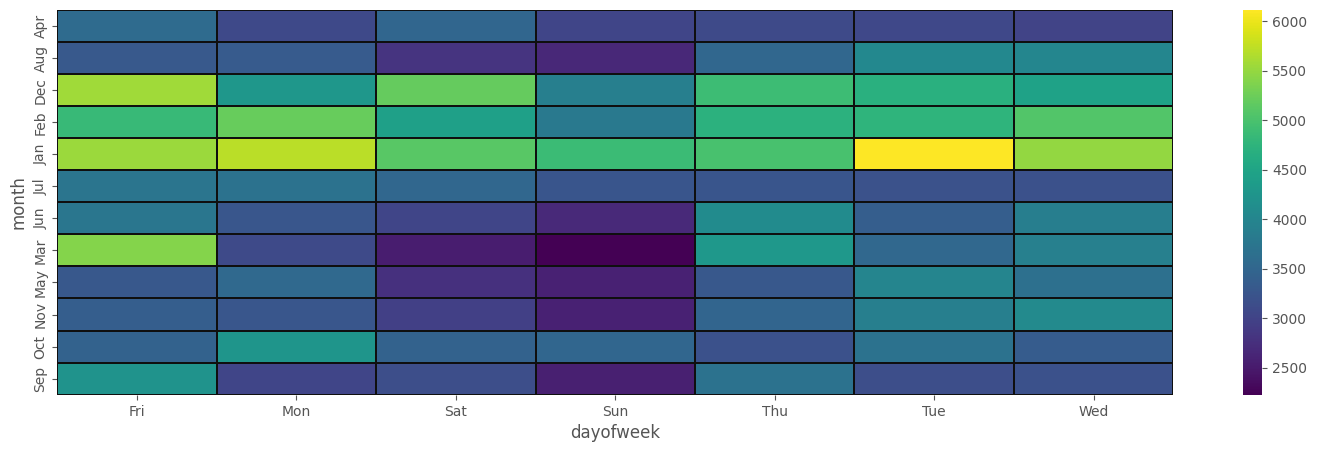

In [113]:
dayHour=data.groupby(by=['month','dayofweek']).count()['reason_cat'].unstack()

plt.figure(figsize=(18,5))
sb.heatmap(dayHour,cmap='viridis',linewidths=0.1, linecolor='#0f0f0f')

In [114]:
data['year'].value_counts()

2016    142310
2017    140286
2018     26542
2015      7910
Name: year, dtype: int64

In [115]:
data['year'].value_counts().iplot(kind='bar',
                                       gridcolor='white',
                                       linecolor='black',
                                       theme='pearl',
                                       bargap=0.3,
                                       opacity=0.7,
                                       title='Yearly Calls',
                                       yTitle='Count',
                                       xTitle='Year'
                                      )

<Axes: xlabel='month', ylabel='year'>

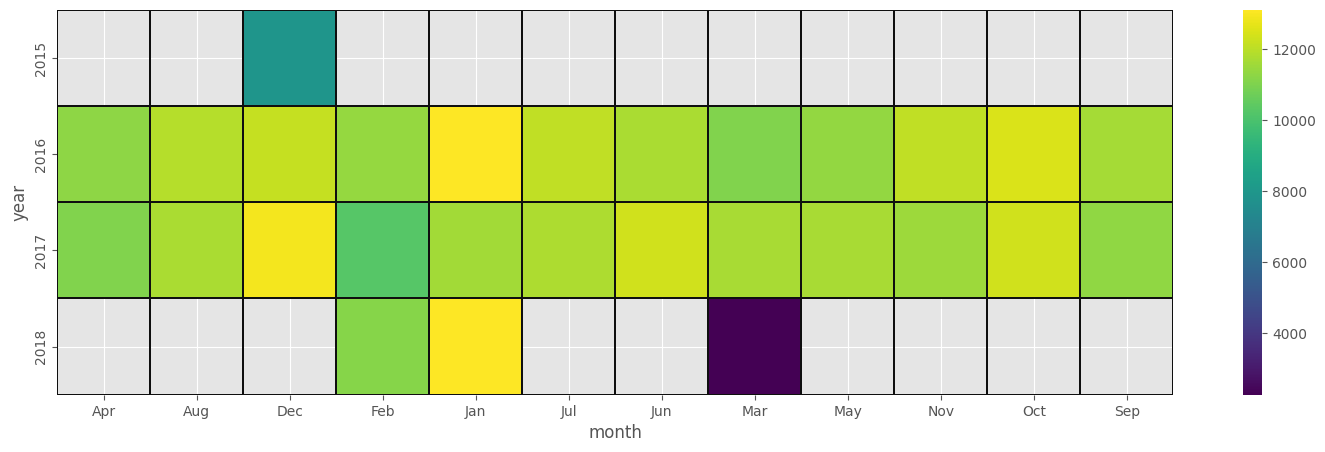

In [116]:
dayHour=data.groupby(by=['year','month']).count()['reason_cat'].unstack()

plt.figure(figsize=(18,5))
sb.heatmap(dayHour,cmap='viridis',linewidths=0.1, linecolor='#0f0f0f')